<center style><h1>Computer Assignment 0</h1></center>

## part 1
First we import pandas library then read .csv file and store it into a data frame.

**head(n):** This function will returns n rows from begining of data frame.

**tail(n):** This function will returns n rows from end of data frame.

**describe(n):** This function will returns n statistics for about each column.

In [1]:
import pandas
initial_data = pandas.read_csv('FuelConsumptionCo2.csv')
print("head(n) :")
print(initial_data.head(5))
print("tail(n) :")
print(initial_data.tail(5))
print("describe() :")
print(initial_data.describe())

head(n) :
   Unnamed: 0  MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  \
0           0       2014  ACURA         ILX      COMPACT         2.0   
1           1       2014  ACURA         ILX      COMPACT         2.4   
2           2       2014  ACURA  ILX HYBRID      COMPACT         1.5   
3           3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5   
4           4       2014  ACURA     RDX AWD  SUV - SMALL         3.5   

   CYLINDERS TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0        4.0          AS5        Z                   9.9                  6.7   
1        4.0           M6        Z                  11.2                  7.7   
2        4.0          AV7        Z                   6.0                  5.8   
3        6.0          AS6        Z                  12.7                  9.1   
4        6.0          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0   

## Part 2

As we see FUELTYPE is not a numerical type so we assign numbers to each type:

In [2]:
print(initial_data.info())
initial_data['FUELTYPE'] = initial_data['FUELTYPE'].astype('category').cat.codes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1067 non-null   int64  
 1   MODELYEAR                 1067 non-null   int64  
 2   MAKE                      1067 non-null   object 
 3   MODEL                     1058 non-null   object 
 4   VEHICLECLASS              1067 non-null   object 
 5   ENGINESIZE                1040 non-null   float64
 6   CYLINDERS                 1033 non-null   float64
 7   TRANSMISSION              1067 non-null   object 
 8   FUELTYPE                  996 non-null    object 
 9   FUELCONSUMPTION_CITY      1067 non-null   float64
 10  FUELCONSUMPTION_HWY       1067 non-null   float64
 11  FUELCONSUMPTION_COMB      1067 non-null   float64
 12  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 13  CO2EMISSIONS              964 non-null    float64
dtypes: float

## Part 3

First we print number of NaN data in each column using number of rows subtract by number of not null data in each column.

Then replace NaN data with mean value of each column.

In the end we extract rows with NaN data in CO2EMITION column and store them in new data frame.

Number of NaN data before replacing with mean value:

In [3]:
print(len(initial_data.index)-initial_data.count())
initial_data['ENGINESIZE'].fillna(value=initial_data['ENGINESIZE'].mean(),inplace=True)
initial_data['CYLINDERS'].fillna(value=initial_data['CYLINDERS'].mean(),inplace=True)
nan_data = initial_data[initial_data.CO2EMISSIONS.isna()]
initial_data.dropna(subset=['CO2EMISSIONS'], inplace=True)

Unnamed: 0                    0
MODELYEAR                     0
MAKE                          0
MODEL                         9
VEHICLECLASS                  0
ENGINESIZE                   27
CYLINDERS                    34
TRANSMISSION                  0
FUELTYPE                      0
FUELCONSUMPTION_CITY          0
FUELCONSUMPTION_HWY           0
FUELCONSUMPTION_COMB          0
FUELCONSUMPTION_COMB_MPG      0
CO2EMISSIONS                103
dtype: int64


Number of NaN data after replacing with mean value:

*MODEL column is not a numerical value so we cannot assign mean value to NaN data.*

Advantages : Easy to implement - Mean and variance will not change

Disadvantages : Results may not be accurate - For large amount of NaN data this method can increase mod value significantly and cause error in results

In [4]:
print(len(initial_data.index)-initial_data.count())

Unnamed: 0                  0
MODELYEAR                   0
MAKE                        0
MODEL                       9
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64


## Part 4

First we filter CO2EMISSIONS then calculate mean value.

In [5]:
import time
start = time.time()
print(f"CO2 Emotion < 240 : {initial_data[initial_data['CO2EMISSIONS'] < 240].FUELCONSUMPTION_CITY.mean()}")
print(f"CO2 Emotion > 300 : {initial_data[initial_data['CO2EMISSIONS'] > 300].FUELCONSUMPTION_CITY.mean()}")
print(f"Executed in {time.time() - start} seconds")

CO2 Emotion < 240 : 10.03781902552204
CO2 Emotion > 300 : 18.663255813953487
Executed in 0.0049970149993896484 seconds


## Part 5

As we can see, using loop will take longer time to execute.

We must expect longer execution time in loop method but for some reason it's taking less time than vectorization.

In [6]:
co2_240_sum = 0
co2_240_count = 0
co2_300_sum = 0
co2_300_count = 0
for index,row in initial_data.iterrows():
    if row['CO2EMISSIONS'] < 240:
        co2_240_sum += row['FUELCONSUMPTION_CITY']
        co2_240_count += 1
    elif row['CO2EMISSIONS'] > 300:
        co2_300_sum += row['FUELCONSUMPTION_CITY']
        co2_300_count += 1
start = time.time()
print(f"CO2 Emotion < 240 : {co2_240_sum/co2_240_count}")
print(f"CO2 Emotion > 300 : {co2_300_sum/co2_300_count}")
print(f"Executed in {time.time() - start} seconds")

CO2 Emotion < 240 : 10.037819025522042
CO2 Emotion > 300 : 18.663255813953487
Executed in 0.0 seconds


## Part 6


array([[<AxesSubplot:title={'center':'ENGINESIZE'}>,
        <AxesSubplot:title={'center':'CYLINDERS'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_CITY'}>],
       [<AxesSubplot:title={'center':'FUELCONSUMPTION_HWY'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_COMB'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_COMB_MPG'}>],
       [<AxesSubplot:title={'center':'CO2EMISSIONS'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

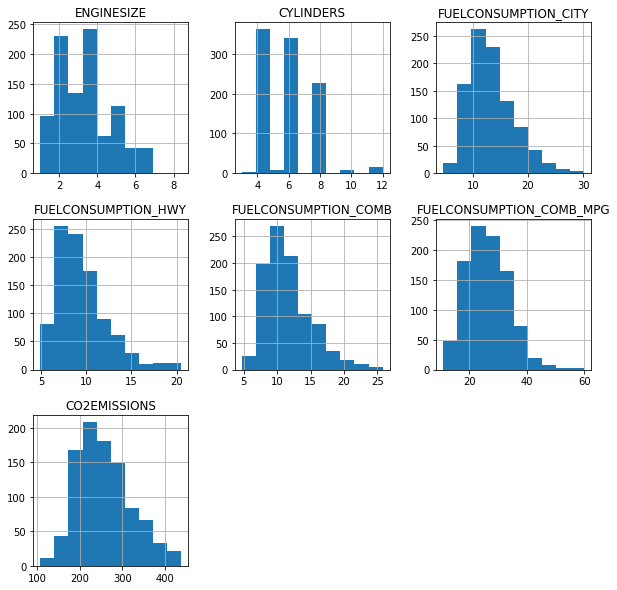

In [7]:
initial_data.hist(column=['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY',
                          'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS'],figsize=(10,10))

## Part 7


array([[<AxesSubplot:title={'center':'ENGINESIZE'}>,
        <AxesSubplot:title={'center':'CYLINDERS'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_CITY'}>],
       [<AxesSubplot:title={'center':'FUELCONSUMPTION_HWY'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_COMB'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_COMB_MPG'}>],
       [<AxesSubplot:title={'center':'CO2EMISSIONS'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

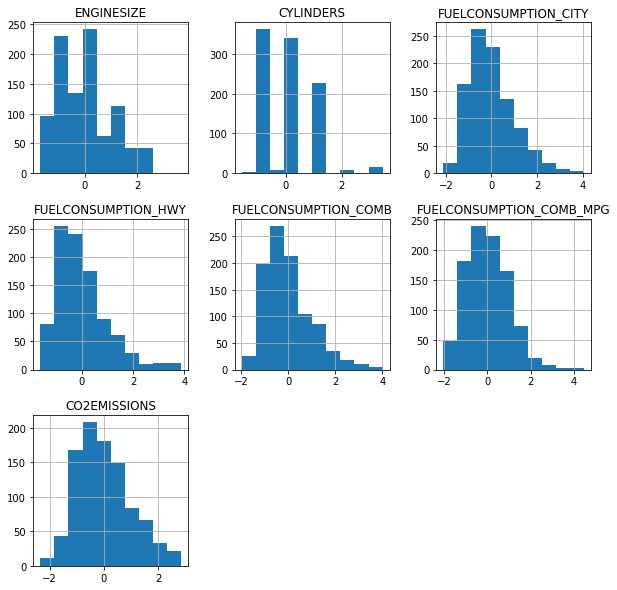

In [8]:
normalized_data = initial_data
normalized_data['ENGINESIZE'] = \
    (initial_data['ENGINESIZE']-initial_data['ENGINESIZE'].mean())/initial_data['ENGINESIZE'].std()
normalized_data['CYLINDERS'] = \
    (initial_data['CYLINDERS']-initial_data['CYLINDERS'].mean())/initial_data['CYLINDERS'].std()
normalized_data['FUELCONSUMPTION_CITY'] = \
    (initial_data['FUELCONSUMPTION_CITY']-initial_data['FUELCONSUMPTION_CITY'].mean())\
    /initial_data['FUELCONSUMPTION_CITY'].std()
normalized_data['FUELCONSUMPTION_HWY'] = \
    (initial_data['FUELCONSUMPTION_HWY']-initial_data['FUELCONSUMPTION_HWY'].mean())\
    /initial_data['FUELCONSUMPTION_HWY'].std()
normalized_data['FUELCONSUMPTION_COMB'] = \
    (initial_data['FUELCONSUMPTION_COMB']-initial_data['FUELCONSUMPTION_COMB'].mean())\
    /initial_data['FUELCONSUMPTION_COMB'].std()
normalized_data['FUELCONSUMPTION_COMB_MPG'] = \
    (initial_data['FUELCONSUMPTION_COMB_MPG']-initial_data['FUELCONSUMPTION_COMB_MPG'].mean())\
    /initial_data['FUELCONSUMPTION_COMB_MPG'].std()
normalized_data['CO2EMISSIONS'] = \
    (initial_data['CO2EMISSIONS']-initial_data['CO2EMISSIONS'].mean())\
    /initial_data['CO2EMISSIONS'].std()
normalized_data.hist(column=['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY',
                          'FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS'],figsize=(10,10))

## Part 8

**B:** As we can see FUELCONSUMPTION_CITY is having the most linear relevant to CO2 emission.

*FUELCONSUMPTION_COMB_MPG is having the most correlation but it relevance in not linear.*

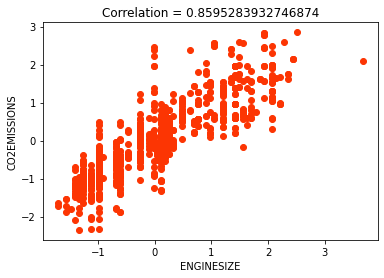

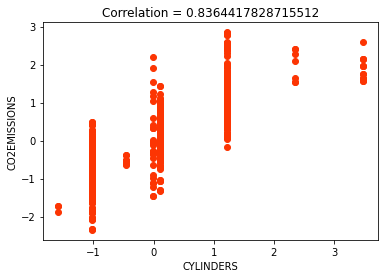

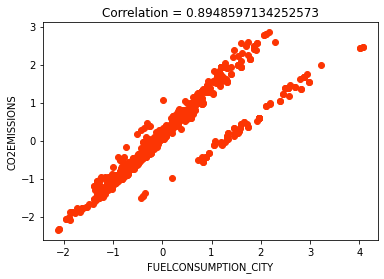

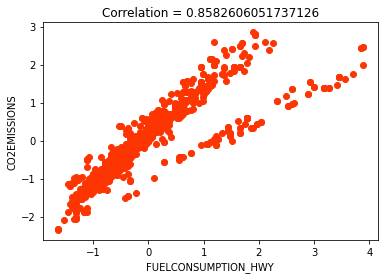

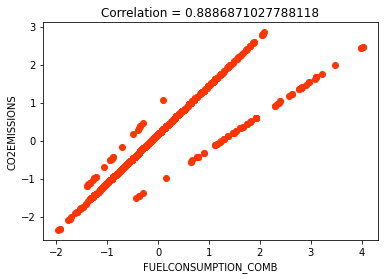

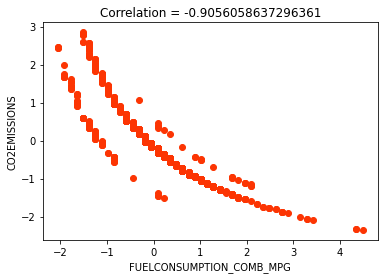

In [9]:
from matplotlib import pyplot

pyplot.scatter(normalized_data['ENGINESIZE'],normalized_data['CO2EMISSIONS'],c='#fc3503')
pyplot.title(f"Correlation = {normalized_data['ENGINESIZE'].corr(normalized_data['CO2EMISSIONS'])}")
pyplot.xlabel('ENGINESIZE')
pyplot.ylabel('CO2EMISSIONS')
pyplot.show()

pyplot.scatter(normalized_data['CYLINDERS'],normalized_data['CO2EMISSIONS'],c='#fc3503')
pyplot.title(f"Correlation = {normalized_data['CYLINDERS'].corr(normalized_data['CO2EMISSIONS'])}")
pyplot.xlabel('CYLINDERS')
pyplot.ylabel('CO2EMISSIONS')
pyplot.show()

pyplot.scatter(normalized_data['FUELCONSUMPTION_CITY'],normalized_data['CO2EMISSIONS'],c='#fc3503')
pyplot.title(f"Correlation = {normalized_data['FUELCONSUMPTION_CITY'].corr(normalized_data['CO2EMISSIONS'])}")
pyplot.xlabel('FUELCONSUMPTION_CITY')
pyplot.ylabel('CO2EMISSIONS')
pyplot.show()

pyplot.scatter(normalized_data['FUELCONSUMPTION_HWY'],normalized_data['CO2EMISSIONS'],c='#fc3503')
pyplot.title(f"Correlation = {normalized_data['FUELCONSUMPTION_HWY'].corr(normalized_data['CO2EMISSIONS'])}")
pyplot.xlabel('FUELCONSUMPTION_HWY')
pyplot.ylabel('CO2EMISSIONS')
pyplot.show()

pyplot.scatter(normalized_data['FUELCONSUMPTION_COMB'],normalized_data['CO2EMISSIONS'],c='#fc3503')
pyplot.title(f"Correlation = {normalized_data['FUELCONSUMPTION_COMB'].corr(normalized_data['CO2EMISSIONS'])}")
pyplot.xlabel('FUELCONSUMPTION_COMB')
pyplot.ylabel('CO2EMISSIONS')
pyplot.show()

pyplot.scatter(normalized_data['FUELCONSUMPTION_COMB_MPG'],normalized_data['CO2EMISSIONS'],c='#fc3503')
pyplot.title(f"Correlation = {normalized_data['FUELCONSUMPTION_COMB_MPG'].corr(normalized_data['CO2EMISSIONS'])}")
pyplot.xlabel('FUELCONSUMPTION_COMB_MPG')
pyplot.ylabel('CO2EMISSIONS')
pyplot.show()

## Part 9

In [10]:
data = [initial_data['FUELCONSUMPTION_CITY'], initial_data['CO2EMISSIONS']]
header = ['FUELCONSUMPTION_CITY', 'CO2EMISSIONS']
linear_data = pandas.concat(data, axis=1, keys=header)

## Part 10

Fist we try to find $h_\theta(x)$ using formula below :

$$
\begin{bmatrix}
1 & x_1\\
1 & x_2\\
. & . \\
. & . \\
. & . \\
1 & x_n\\
\end{bmatrix}
\begin{bmatrix}
\theta_0\\
\theta_1\\
\end{bmatrix}
=
\begin{bmatrix}
y_1\\
y_2\\
.\\
.\\
.\\
y_n\\
\end{bmatrix}
$$

By having $h_\theta(x)$ we calculate $\theta_0$ and $\theta_1$.

Then we calculate our hypothesize function $h_\theta(x)$.

In the end we calculate MSE wo verify that our error is in acceptable range.

In [11]:
import numpy

x_train, y_train = linear_data.values[:, 0], linear_data.values[:, 1]
x_train = x_train.reshape((len(x_train), 1))
theta = numpy.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)
h = x_train.dot(theta)
theta_1 = ((x_train[0] - x_train[1]) / (h[0] - h[1]))[0]
theta_0 = h[0] - (theta_1 * x_train[0])[0]
print(f"theta_0 = {theta_0}")
print(f"theta_1 = {theta_1}")
print(f"MSE = {sum((h - y_train) ** 2) / len(h)}")

theta_0 = 0.1855886302194305
theta_1 = 1.1174935970380178
MSE = 0.19901942721659074


## Part 11

As we can se in plot below, red line is our regression line. With this line we can predict how mutch a car emites CO2 by having it's cit fuel consumption.

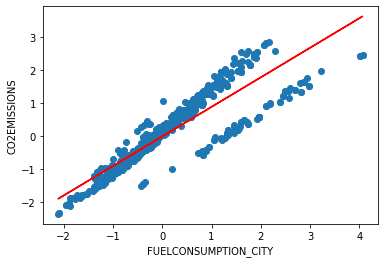

In [12]:
pyplot.scatter(x_train, y_train)
pyplot.plot(x_train, h, color='red')
pyplot.xlabel('FUELCONSUMPTION_CITY')
pyplot.ylabel('CO2EMISSIONS')
pyplot.show()

## Part 12

In [13]:
def co2_emition(fuel_consumption):
    return (fuel_consumption*theta_1) + theta_0

nan_data['CO2EMISSIONS'] = co2_emition(nan_data['FUELCONSUMPTION_CITY'])

print(nan_data.to_string())
nan_data.to_csv('Prediction_Data.csv')

      Unnamed: 0  MODELYEAR           MAKE                            MODEL              VEHICLECLASS  ENGINESIZE  CYLINDERS TRANSMISSION  FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS
3              3       2014          ACURA                          MDX 4WD               SUV - SMALL    3.500000   6.000000          AS6         3                  12.7                  9.1                  11.1                        25     14.377757
20            20       2014           AUDI                       A4 QUATTRO                   COMPACT    2.000000   4.000000          AS8         3                  11.5                  8.1                  10.0                        28     13.036765
30            30       2014           AUDI                               A8                  MID-SIZE    3.000000   6.000000          AS8        -1                  13.1                  8.8                  11.2                        25   

C:\Users\SM2A\AppData\Local\Temp/ipykernel_9560/827377543.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nan_data['CO2EMISSIONS'] = co2_emition(nan_data['FUELCONSUMPTION_CITY'])
